In [3]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 76.6 MB/s 
     |████████████████████████████████| 994 kB 72.0 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 15.0 MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365096 sha256=c818050f65b44cf7b2277ba52dbb19548072b1cd89c0512eadb81741d317e146
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osgeo import gdal
import sys
import os
from glob import glob
import earthpy.spatial as es

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Dataset_2017to2020_Area1.csv')

In [6]:
S_sentinel_bands = glob("/content/drive/MyDrive/Senti_Images-2017to2020_Area1/*UL.tif")

In [7]:
## Read tif image as Array :

def tif_to_matrix(path):
  src_ds = gdal.Open(path)
  data = src_ds.ReadAsArray()
  return data 

In [8]:
## Normalize bands into 0.0 - 1.0 scale :
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [58]:
## Create a dataset of images bands means :
import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("UL.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          band = normalize(image[i])
          list_bands.append(band.mean())
        ndmi = es.normalized_diff(image[7], image[10])
        ndvi = es.normalized_diff(image[7], image[3])
        savi = ((image[7] - image[3]) / (image[7] + image[3] + L)) * (1 + L)
        mndwi = es.normalized_diff(image[2], image[10])
        mndwi = normalize(mndwi)
        list_bands.append(ndmi.mean())
        list_bands.append(ndvi.mean())
        list_bands.append(savi.mean())
        list_bands.append(mndwi.mean())
        List_images.append(list_bands)

In [59]:
List_images = np.array(List_images)

In [60]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11','ndmi','ndvi','savi','mndwi'])

In [61]:
df_bands.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,ndmi,ndvi,savi,mndwi
0,0.29,0.19,0.21,0.28,0.27,0.35,0.40,0.40,0.43,0.53,0.39,0.44,6.51,0.36,0.55,0.37
1,0.24,0.23,0.22,0.31,0.27,0.35,0.38,0.38,0.40,0.51,0.40,0.43,7.05,0.28,0.42,0.40
2,0.31,0.23,0.26,0.32,0.35,0.36,0.38,0.41,0.42,0.56,0.54,0.53,8.28,0.22,0.33,0.24
3,0.44,0.29,0.25,0.43,0.35,0.26,0.22,0.24,0.23,0.29,0.52,0.58,8.32,0.18,0.27,0.31
4,0.40,0.35,0.30,0.44,0.37,0.38,0.38,0.36,0.42,0.37,0.41,0.45,7.76,0.09,0.13,0.48


In [26]:
df_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [ ]:
df_bands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B1             169 non-null    float64
 1   B2             169 non-null    float64
 2   B3             169 non-null    float64
 3   B4             169 non-null    float64
 4   B5             169 non-null    float64
 5   B6             169 non-null    float64
 6   B7             169 non-null    float64
 7   B8             169 non-null    float64
 8   B8A            169 non-null    float64
 9   B9             169 non-null    float64
 10  B10            169 non-null    float64
 11  B11            169 non-null    float64
 12  ndmi           169 non-null    float64
 13  ndvi           169 non-null    float64
 14  savi           169 non-null    float64
 15  mndwi          169 non-null    float64
 16  soil_moisture  169 non-null    float64
dtypes: float64(17)
memory usage: 22.6 KB


In [ ]:
df_bands.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,ndmi,ndvi,savi,mndwi,soil_moisture
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.363538,0.289854,0.307451,0.363138,0.370084,0.391633,0.406083,0.403277,0.422102,0.458841,0.491053,0.474000,7.986945,0.310643,0.465920,0.303123,0.194497
std,0.105235,0.099629,0.094567,0.100463,0.096198,0.079254,0.079755,0.077626,0.078993,0.084755,0.107840,0.099612,3.550404,0.391836,0.587729,0.144034,0.075803
min,0.090712,0.124272,0.154271,0.168255,0.195582,0.251808,0.219970,0.239281,0.232008,0.233180,0.289871,0.244044,0.100317,0.038461,0.057689,0.017775,0.090000
25%,0.292281,0.214696,0.228207,0.272604,0.275271,0.331541,0.355375,0.343737,0.369539,0.408752,0.405769,0.399919,6.309197,0.147572,0.221334,0.173808,0.135000
50%,0.365877,0.281173,0.297920,0.352340,0.359778,0.383881,0.404939,0.396740,0.422334,0.465771,0.480319,0.467511,8.200265,0.199597,0.299367,0.305356,0.192000
75%,0.432944,0.319826,0.345895,0.440771,0.439667,0.442956,0.463699,0.454318,0.480589,0.511832,0.571512,0.564643,9.693261,0.335832,0.503697,0.392437,0.235000
max,0.655022,0.650449,0.635402,0.633443,0.638579,0.647961,0.647582,0.612454,0.632681,0.680377,0.730756,0.715309,17.358795,2.812481,4.218595,0.708905,0.502000


In [73]:
df_bands.corr()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,ndmi,ndvi,savi,mndwi
B1,1.00,0.77,0.72,0.68,0.67,0.44,0.33,0.30,0.27,0.43,0.47,0.59,-0.25,0.17,0.17,-0.17
B2,0.77,1.00,0.98,0.88,0.86,0.69,0.58,0.58,0.51,0.44,0.52,0.59,-0.45,0.28,0.28,-0.21
B3,0.72,0.98,1.00,0.89,0.92,0.76,0.66,0.66,0.60,0.48,0.57,0.59,-0.43,0.27,0.27,-0.26
B4,0.68,0.88,0.89,1.00,0.95,0.66,0.56,0.59,0.54,0.38,0.79,0.80,-0.33,0.11,0.11,-0.37
B5,0.67,0.86,0.92,0.95,1.00,0.77,0.69,0.69,0.67,0.49,0.78,0.73,-0.31,0.15,0.15,-0.43
B6,0.44,0.69,0.76,0.66,0.77,1.00,0.97,0.94,0.93,0.67,0.47,0.38,-0.52,0.27,0.27,-0.26
B7,0.33,0.58,0.66,0.56,0.69,0.97,1.00,0.97,0.98,0.71,0.42,0.31,-0.54,0.24,0.24,-0.25
B8,0.30,0.58,0.66,0.59,0.69,0.94,0.97,1.00,0.97,0.70,0.46,0.34,-0.55,0.24,0.24,-0.28
B8A,0.27,0.51,0.60,0.54,0.67,0.93,0.98,0.97,1.00,0.72,0.44,0.31,-0.49,0.21,0.21,-0.29
B9,0.43,0.44,0.48,0.38,0.49,0.67,0.71,0.70,0.72,1.00,0.32,0.26,-0.35,0.22,0.22,-0.23


In [ ]:
import os
List_images = []
L = 0.5
directory = r'/content/drive/MyDrive/Senti_Images-2017to2020_Area1'
for filename in os.listdir(directory):
    if filename.endswith("UL.tif") :
        image = tif_to_matrix(os.path.join(directory, filename))
        list_bands=[]
        for i in range (12) :
          if i==3 or i==4 or i ==11 or i == 10: 
            band = normalize(image[i])
            list_bands.append(band.mean())
        ndmi = es.normalized_diff(image[7], image[10])
        ndvi = es.normalized_diff(image[7], image[3])
        savi = ((image[7] - image[3]) / (image[7] + image[3] + L)) * (1 + L)
        mndwi = es.normalized_diff(image[2], image[10])
        list_bands.append(ndvi.mean())
        list_bands.append(savi.mean())
        list_bands.append(mndwi.mean())
        List_images.append(list_bands)

In [ ]:
List_images = np.array(List_images)

In [ ]:
df_5_bands = pd.DataFrame(List_images,columns=['B4','B5','B10','B11','ndvi','savi','mndwi'])

In [ ]:
df_5_bands['soil_moisture'] = df["soil_moisture_depth_0.05"]

In [ ]:
df_4_bands.corr()

,B1,B2,B4,B8,B10,ndmi,ndvi,savi,soil_moisture
B1,1.000000,0.774352,0.683294,0.295461,0.474341,-0.245458,0.174858,0.174874,0.000297
B2,0.774352,1.000000,0.875965,0.579845,0.524502,-0.454406,0.281908,0.281928,-0.036750
B4,0.683294,0.875965,1.000000,0.588068,0.793035,-0.327065,0.110745,0.110766,-0.284337
B8,0.295461,0.579845,0.588068,1.000000,0.459356,-0.553286,0.240222,0.240229,-0.122135
B10,0.474341,0.524502,0.793035,0.459356,1.000000,-0.031460,-0.074007,-0.073994,-0.372533
ndmi,-0.245458,-0.454406,-0.327065,-0.553286,-0.031460,1.000000,-0.452421,-0.452431,0.028500
ndvi,0.174858,0.281908,0.110745,0.240222,-0.074007,-0.452421,1.000000,1.000000,0.172052
savi,0.174874,0.281928,0.110766,0.240229,-0.073994,-0.452431,1.000000,1.000000,0.172043
soil_moisture,0.000297,-0.036750,-0.284337,-0.122135,-0.372533,0.028500,0.172052,0.172043,1.000000


In [ ]:
df_5_bands.corr()

,B4,B5,B10,B11,ndvi,savi,mndwi,soil_moisture
B4,1.000000,0.950794,0.793035,0.797771,0.110745,0.110766,-0.663182,-0.284337
B5,0.950794,1.000000,0.778894,0.732059,0.150424,0.150441,-0.606711,-0.190049
B10,0.793035,0.778894,1.000000,0.914505,-0.074007,-0.073994,-0.391505,-0.372533
B11,0.797771,0.732059,0.914505,1.000000,-0.032902,-0.032885,-0.477063,-0.387460
ndvi,0.110745,0.150424,-0.074007,-0.032902,1.000000,1.000000,-0.347480,0.172052
savi,0.110766,0.150441,-0.073994,-0.032885,1.000000,1.000000,-0.347502,0.172043
mndwi,-0.663182,-0.606711,-0.391505,-0.477063,-0.347480,-0.347502,1.000000,0.131162
soil_moisture,-0.284337,-0.190049,-0.372533,-0.387460,0.172052,0.172043,0.131162,1.000000


In [ ]:
df_4_bands.describe()

,B1,B2,B4,B8,B10,ndmi,ndvi,savi,soil_moisture
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.363538,0.289854,0.363138,0.403277,0.491053,7.986945,0.310643,0.465920,0.194497
std,0.105235,0.099629,0.100463,0.077626,0.107840,3.550404,0.391836,0.587729,0.075803
min,0.090712,0.124272,0.168255,0.239281,0.289871,0.100317,0.038461,0.057689,0.090000
25%,0.292281,0.214696,0.272604,0.343737,0.405769,6.309197,0.147572,0.221334,0.135000
50%,0.365877,0.281173,0.352340,0.396740,0.480319,8.200265,0.199597,0.299367,0.192000
75%,0.432944,0.319826,0.440771,0.454318,0.571512,9.693261,0.335832,0.503697,0.235000
max,0.655022,0.650449,0.633443,0.612454,0.730756,17.358795,2.812481,4.218595,0.502000


# PCA :


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11','ndmi','ndvi','savi','mndwi']
# Separating out the features
x = df_bands.loc[:, features].values
# Separating out the target
y = df_bands.loc[:,['soil_moisture']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [ ]:
finalDf = pd.concat([principalDf, df_bands[['soil_moisture']]], axis = 1)

In [ ]:
pca.explained_variance_ratio_

array([0.53694437, 0.16438808, 0.10885462])

# Linear Regressiion MODEL :

In [ ]:
X, y = finalDf.iloc[:,:-1],finalDf.iloc[:,-1]

Coefficients:  [-1.16259926e-01  5.56061815e-02  2.42066570e-03  2.58498034e+00
 -1.91474547e+01  3.54362973e+00 -5.86296897e-04 -1.59321860e+00
  3.16227116e-01 -1.20965602e-02 -9.20798781e-01  8.75217941e-03
 -5.18191990e-01]
Variance score: 0.7786386580298951
MAE score: 3.7456376770292286


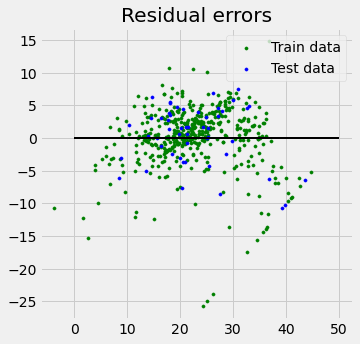

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error
mae = mean_absolute_error(y_test, reg.predict(X_test))
print('MAE score: {}'.format(mae))
## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()



# SVM MODEL :


In [ ]:
X = finalDf.iloc[:, :1].values
y = finalDf.iloc[:, -1].values

In [ ]:
X.shape

(169, 1)

In [ ]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=1)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred

array([0.15174972, 0.15735182, 0.20245391, 0.23428842, 0.23371852,
       0.22100468, 0.15593107, 0.17453264, 0.17172262, 0.17303784,
       0.17462973, 0.17433286, 0.22854131, 0.15976765, 0.17649577,
       0.23483338, 0.17316324, 0.15514976, 0.22564809, 0.16699321,
       0.16696364, 0.17770853, 0.2328529 , 0.2324256 , 0.23283339,
       0.17467028, 0.23202225, 0.15914179, 0.15497444, 0.15480263,
       0.17443372, 0.16774067, 0.19760983, 0.16964428])

In [ ]:
mean_absolute_error(y_test, y_pred)

0.7547687940062805

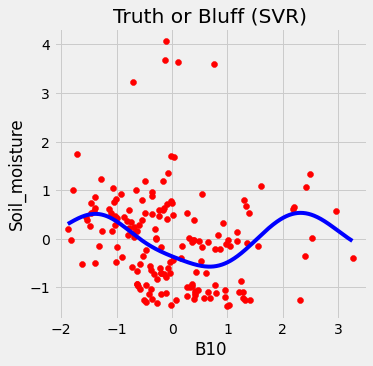

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('B10')
plt.ylabel('Soil_moisture')
plt.show()

# XGB MODEL :


In [ ]:
# evaluate an xgboost regression model on the housing dataset
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X, y = finalDf.iloc[:,:-1],finalDf.iloc[:,-1]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.04


In [ ]:
params['eval_metric'] = "mae"

In [ ]:
num_boost_round = 999

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[22:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.273573
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.246804
[2]	Test-mae:0.222525
[3]	Test-mae:0.200796
[4]	Test-mae:0.181087
[5]	Test-mae:0.163449
[6]	Test-mae:0.14745
[7]	Test-mae:0.133132
[8]	Test-mae:0.120237
[9]	Test-mae:0.108531
[10]	Test-mae:0.098562
[11]	Test-mae:0.089009
[12]	Test-mae:0.080386
[13]	Test-mae:0.073072
[14]	Test-mae:0.066037
[15]	Test-mae:0.059709
[16]	Test-mae:0.055157
[17]	Test-mae:0.052173
[18]	Test-mae:0.050567
[19]	Test-mae:0.049435
[20]	Test-mae:0.048635
[21]	Test-mae:0.047471
[22]	Test-mae:0.046541
[23]	Test-mae:0.045642
[24]	Test-mae:0.044889
[25]	Test-mae:0.044371
[26]	Test-mae:0.043757
[27]	Test-mae:0.04304
[28]	Test-mae:0.042544
[29]	Test-mae:0.041933
[30]	Test-mae:0.041535
[31]	Test-mae:0.041135
[32]	Test-mae:0.040917
[33]	Test-mae:0.040827
[34]	Test-mae:0.040827
[35]	Test-mae:0.040751
[

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 0.04 with 36 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[22:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.276688,0.002362,0.276950,0.010460
1,0.251371,0.002037,0.251829,0.010381
2,0.228807,0.001713,0.229632,0.010218
3,0.208466,0.001402,0.209610,0.010044
4,0.190176,0.001146,0.191603,0.009918
...,...,...,...,...
104,0.048839,0.002088,0.056796,0.006085
105,0.048837,0.002089,0.056795,0.006086
106,0.048835,0.002090,0.056794,0.006085
107,0.048835,0.002090,0.056792,0.006085


In [ ]:
cv_results['test-mae-mean'].min()

0.056791999999999995

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,12)
    for min_child_weight in range(5,9)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=1, min_child_weight=5
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0554088 for 108 rounds
CV with max_depth=1, min_child_weight=6
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [ ]:
params['max_depth'] = 1
params['min_child_weight'] = 8

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


CV with subsample=1.0, colsample=1.0
[22:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.05472900000000001 for 107 rounds
CV with subsample=1.0, colsample=0.9
[22:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [ ]:
params['subsample'] = 1.
params['colsample_bytree'] = .7

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time 
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CV with eta=0.3
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0544914 for 124 rounds

CV with eta=0.2
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
[22:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of r

In [ ]:
params['eta'] = .3

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[22:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.273573
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.246804
[2]	Test-mae:0.222694
[3]	Test-mae:0.20098
[4]	Test-mae:0.181423
[5]	Test-mae:0.163809
[6]	Test-mae:0.147945
[7]	Test-mae:0.133657
[8]	Test-mae:0.120788
[9]	Test-mae:0.109198
[10]	Test-mae:0.098759
[11]	Test-mae:0.089357
[12]	Test-mae:0.080889
[13]	Test-mae:0.073263
[14]	Test-mae:0.067649
[15]	Test-mae:0.062076
[16]	Test-mae:0.056162
[17]	Test-mae:0.05253
[18]	Test-mae:0.050267
[19]	Test-mae:0.048775
[20]	Test-mae:0.047536
[21]	Test-mae:0.046513
[22]	Test-mae:0.04583
[23]	Test-mae:0.045214
[24]	Test-mae:0.044457
[25]	Test-mae:0.043978
[26]	Test-mae:0.043366
[27]	Test-mae:0.042839
[28]	Test-mae:0.042348
[29]	Test-mae:0.041714
[30]	Test-mae:0.041142
[31]	Test-mae:0.040774
[32]	Test-mae:0.040454
[33]	Test-mae:0.040189
[34]	Test-mae:0.040185
[35]	Test-mae:0.040185
[3

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[22:52:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.273573
[1]	Test-mae:0.246804
[2]	Test-mae:0.222694
[3]	Test-mae:0.20098
[4]	Test-mae:0.181423
[5]	Test-mae:0.163809
[6]	Test-mae:0.147945
[7]	Test-mae:0.133657
[8]	Test-mae:0.120788
[9]	Test-mae:0.109198
[10]	Test-mae:0.098759
[11]	Test-mae:0.089357
[12]	Test-mae:0.080889
[13]	Test-mae:0.073263
[14]	Test-mae:0.067649
[15]	Test-mae:0.062076
[16]	Test-mae:0.056162
[17]	Test-mae:0.05253
[18]	Test-mae:0.050267
[19]	Test-mae:0.048775
[20]	Test-mae:0.047536
[21]	Test-mae:0.046513
[22]	Test-mae:0.04583
[23]	Test-mae:0.045214
[24]	Test-mae:0.044457
[25]	Test-mae:0.043978
[26]	Test-mae:0.043366
[27]	Test-mae:0.042839
[28]	Test-mae:0.042348
[29]	Test-mae:0.041714
[30]	Test-mae:0.041142
[31]	Test-mae:0.040774
[32]	Test-mae:0.040454
[33]	Test-mae:0.040189
[34]	Test-mae:0.040185
[35]	Test-mae:0.040185
[36]	Test-mae:0.040185
[37]	Test-mae:0.040185
[38]	Test-ma

In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.04001937573797563

## Without tuning :

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 1, alpha = 1, n_estimators = 1000)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[23:07:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.081718


In [ ]:
mean_absolute_error(y_test, preds)

0.0580097531414032

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.9,'learning_rate': 0.1,
                'max_depth': 4, 'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=999,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)

[23:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.276498,0.002189,0.276517,0.004982
1,0.251211,0.002561,0.251213,0.006248
2,0.228662,0.002885,0.229006,0.007078
3,0.208362,0.003185,0.208702,0.008152
4,0.190048,0.003438,0.190665,0.008836


In [ ]:
print((cv_results["test-mae-mean"]).tail(1))

117    0.056901
Name: test-mae-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=999)

[23:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


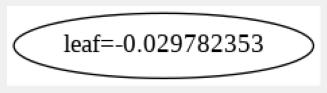

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

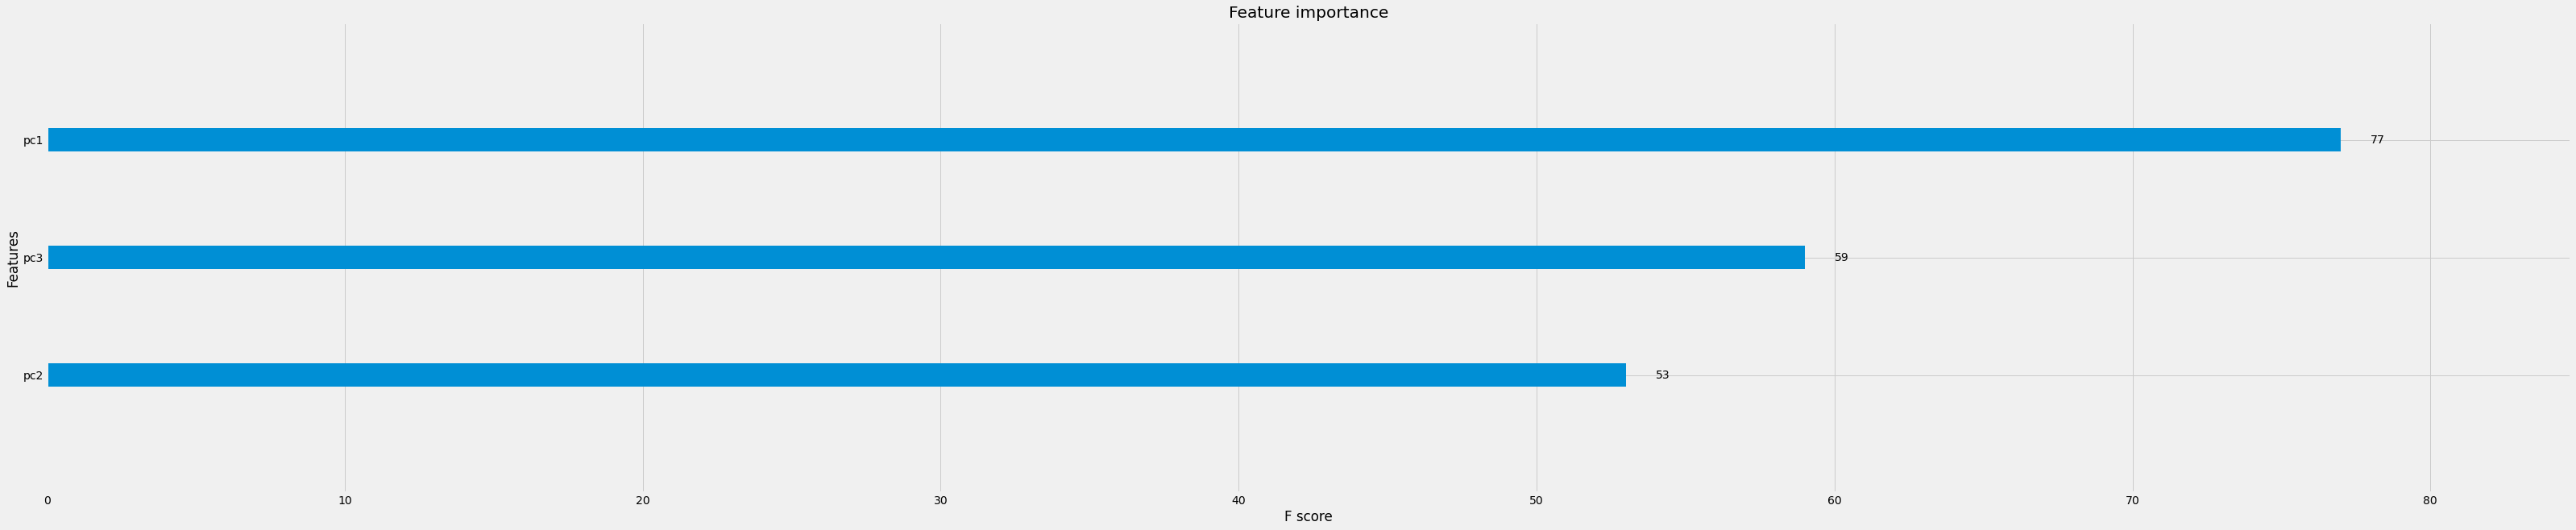

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Lazy Predict :

In [2]:
pip install lazypredict

     |████████████████████████████████| 72 kB 697 kB/s 
     |████████████████████████████████| 269 kB 12.2 MB/s 
     |████████████████████████████████| 248 kB 49.7 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 6.8 MB 49.6 MB/s 
     |████████████████████████████████| 10.1 MB 48.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
     |████████████████████████████████| 302 kB 49.0 MB/s 
     |████████████████████████████████| 1.2 MB 43.9 MB/s 
     |████████████████████████████████| 14.5 MB 6.5 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=d5c2486e6baa6d79abdf8c361786f45eda0c6afe9c131494bd1e55ae37afa0f0
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully u

In [62]:
import lazypredict
### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
### Importing dataset available in sklearn
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [67]:
X, y = df_bands.iloc[:,:-1],df_bands.iloc[:,-1]

In [68]:
X = X.astype(float)
y = y.astype(float)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [70]:
X_test

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,ndmi,ndvi,savi
91,0.31,0.19,0.21,0.28,0.31,0.30,0.34,0.33,0.37,0.41,0.42,0.40,8.72,0.21,0.31
72,0.35,0.22,0.22,0.25,0.27,0.31,0.32,0.33,0.33,0.42,0.42,0.45,11.99,0.26,0.39
138,0.28,0.18,0.20,0.23,0.24,0.37,0.43,0.44,0.47,0.51,0.32,0.32,3.68,0.41,0.62
53,0.42,0.35,0.30,0.35,0.33,0.32,0.34,0.33,0.36,0.48,0.38,0.37,14.06,0.18,0.27
146,0.51,0.33,0.36,0.48,0.45,0.47,0.48,0.46,0.48,0.46,0.66,0.56,8.07,0.17,0.25
87,0.30,0.17,0.19,0.22,0.26,0.30,0.35,0.33,0.37,0.47,0.38,0.36,5.37,0.40,0.59
127,0.55,0.57,0.56,0.56,0.55,0.56,0.56,0.56,0.56,0.52,0.55,0.57,0.51,0.05,0.08
129,0.37,0.25,0.30,0.31,0.35,0.42,0.43,0.42,0.44,0.59,0.44,0.35,7.26,0.36,0.54
136,0.12,0.12,0.15,0.17,0.20,0.27,0.30,0.30,0.32,0.27,0.29,0.24,4.15,0.46,0.68
79,0.37,0.21,0.22,0.26,0.28,0.35,0.40,0.39,0.40,0.44,0.46,0.48,7.23,0.39,0.59


In [71]:
### fitting data in LazyRegressor because here we are solving Regression use case. 
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [72]:
### fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████| 42/42 [00:02<00:00, 18.71it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                       -4.87       0.63  0.06        0.05
SVR                                         -5.13       0.62  0.07        0.02
KNeighborsRegressor                         -5.22       0.61  0.07        0.01
ExtraTreesRegressor                         -7.05       0.50  0.08        0.16
TransformedTargetRegressor                  -8.28       0.42  0.08        0.01
LinearRegression                            -8.28       0.42  0.08        0.01
HistGradientBoostingRegressor               -8.31       0.42  0.08        0.12
LassoLarsCV                                 -8.72       0.39  0.08        0.04
LarsCV                                      -8.72       0.39  0.08        0.07
ElasticNetCV                                -8.81       0.39  0.08        0.11
LassoCV                                     -8.85   